<a href="https://colab.research.google.com/github/navendu10/MLmodels_NB/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Dataset Overview and Classification Objectives

## Dataset Overview

- **Name:** CIFAR-10
- **Source:** Canadian Institute for Advanced Research
- **Description:** CIFAR-10 is a widely-used dataset for machine learning and computer vision applications.
- **Classes:** 10 (airplanes, cars, birds, cats, deers, dogs, frogs, horses, ships, trucks)
- **Image Size:** 32 x 32 pixels
- **Channels:** 3 (RGB)
- **Total Images:** 60,000
  - **Training Images:** 50,000
  - **Testing Images:** 10,000
- **Balanced:** Each class contains 6,000 images

## Objectives

1. **Visualize Data:**
   - The images are of low resolution (32 x 32 pixels) and are divided into 10 classes. Visualization will help understand the dataset and the characteristics of each class.

2. **Dataset Splitting:**
   - **Training Set:** 50,000 images used to train the model.
   - **Testing Set:** 10,000 images used to evaluate the model. These images must not be seen by the model during training.

3. **Model Training:**
   - **Objective:** Train a classifier model (Convolutional Neural Network) to classify images into one of the 10 classes.
   - **Method:** Use the training set to adjust the weights of the model.

4. **Model Evaluation:**
   - Evaluate the model performance using the testing set to ensure that the model generalizes well to new, unseen images.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
k = len(set(y_train))
print("number of classes: ", k)

number of classes:  10


In [ ]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation= 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i,x)


In [ ]:
model.compile (optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.3497 - loss: 1.7494 - val_accuracy: 0.5306 - val_loss: 1.3271
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5253 - loss: 1.3083 - val_accuracy: 0.6001 - val_loss: 1.1100
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5910 - loss: 1.1483 - val_accuracy: 0.6329 - val_loss: 1.0331
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6209 - loss: 1.0544 - val_accuracy: 0.6496 - val_loss: 0.9941
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6512 - loss: 0.9792 - val_accuracy: 0.6725 - val_loss: 0.9390
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6748 - loss: 0.9259 - val_accuracy: 0.6880 - val_loss: 0.8931
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6955 - loss: 0.8589 - val_accuracy: 0.6998 - val_loss: 0.8598
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7101 - loss: 0.806

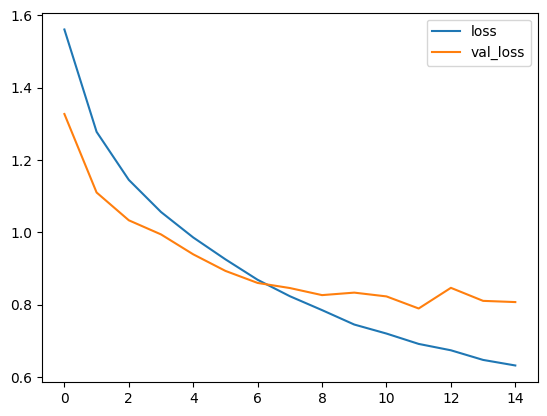

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

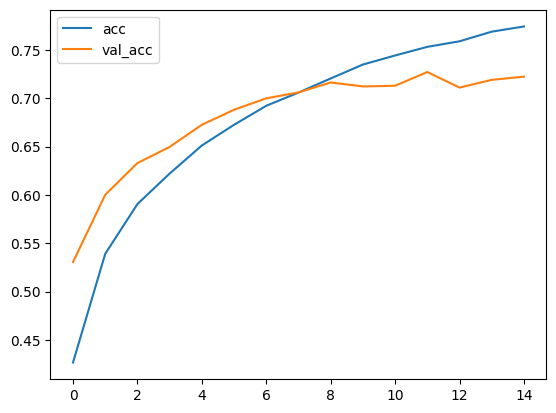

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Confusion matrix, without normalization
[[793  21  32  15  22   1   8  10  74  24]
 [ 13 846   8   8   3   1  13   2  34  72]
 [ 83   6 574  47 119  53  86  18  10   4]
 [ 35   9  74 489  92 149 104  23  14  11]
 [ 27   2  52  41 739  25  70  33  10   1]
 [ 15   5  49 178  65 579  47  48   6   8]
 [  9   4  36  30  33  15 854   4  11   4]
 [ 19   4  50  47  93  36  13 730   3   5]
 [ 70  23   8  12  10   7   5   2 846  17]
 [ 49  90   9  16  10   4  14  11  25 772]]


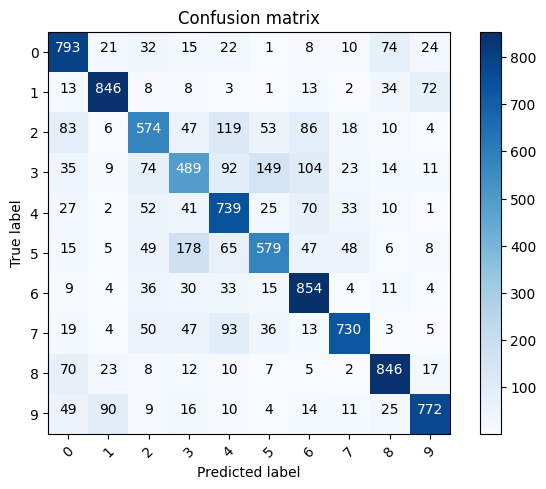

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

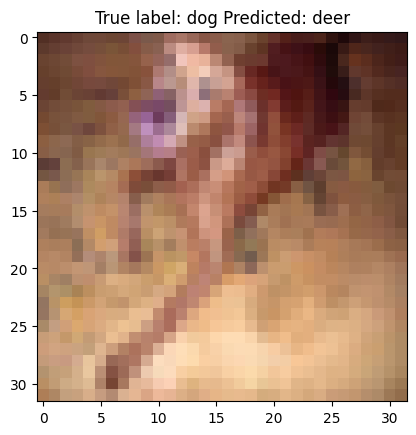

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));